In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf

plt.rcParams['figure.figsize'] = 25,18

import warnings
warnings.filterwarnings('ignore')

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
#import dataset
df = pd.read_csv(r"C:\Users\Gundeep Gulati\Desktop\archive\covid_19_data.csv")

In [4]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
df.shape

(172480, 8)

In [6]:
#to replace column name with another name 
df.rename(columns={'Country/Region': 'Country'}, inplace = True)
df.rename(columns={'ObservationDate': 'Date'}, inplace = True)
df.rename(columns={'Province/State': 'State'}, inplace = True)

In [7]:
df.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SNo          172480 non-null  int64  
 1   Date         172480 non-null  object 
 2   State        124597 non-null  object 
 3   Country      172480 non-null  object 
 4   Last Update  172480 non-null  object 
 5   Confirmed    172480 non-null  float64
 6   Deaths       172480 non-null  float64
 7   Recovered    172480 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.5+ MB


In [9]:
df.isnull().sum()

SNo                0
Date               0
State          47883
Country            0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [10]:
pd.options.display.float_format = '{:.2f}'.format

In [11]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,172480.00,172480.00,172480.00,172480.00
mean,86240.50,33231.56,1050.03,21028.25
std,49790.83,103134.89,3499.44,115659.79
min,1.00,-302844.00,-178.00,-854405.00
25%,43120.75,457.00,6.00,10.00
50%,86240.50,4016.50,76.00,858.00
75%,129360.25,18843.00,554.00,7229.00
max,172480.00,2290891.00,54804.00,5624444.00


In [12]:
#confirmed cases grouped by date
confirmed_cases = df.groupby('Date').sum()['Confirmed'].reset_index()

In [13]:
confirmed_cases

,Date,Confirmed
0,01/22/2020,555.00
1,01/23/2020,653.00
2,01/24/2020,941.00
3,01/25/2020,1438.00
4,01/26/2020,2118.00
...,...,...
315,12/02/2020,64530517.00
316,12/03/2020,65221040.00
317,12/04/2020,65899441.00
318,12/05/2020,66540034.00


In [14]:
death_cases = df.groupby('Date').sum()['Deaths'].reset_index()
recovered_cases = df.groupby('Date').sum()['Recovered'].reset_index()

In [15]:
death_cases

,Date,Deaths
0,01/22/2020,17.00
1,01/23/2020,18.00
2,01/24/2020,26.00
3,01/25/2020,42.00
4,01/26/2020,56.00
...,...,...
315,12/02/2020,1493742.00
316,12/03/2020,1506260.00
317,12/04/2020,1518670.00
318,12/05/2020,1528868.00


In [16]:
recovered_cases

,Date,Recovered
0,01/22/2020,28.00
1,01/23/2020,30.00
2,01/24/2020,36.00
3,01/25/2020,39.00
4,01/26/2020,52.00
...,...,...
315,12/02/2020,41496318.00
316,12/03/2020,41932091.00
317,12/04/2020,42352021.00
318,12/05/2020,42789879.00


<AxesSubplot:xlabel='Date'>

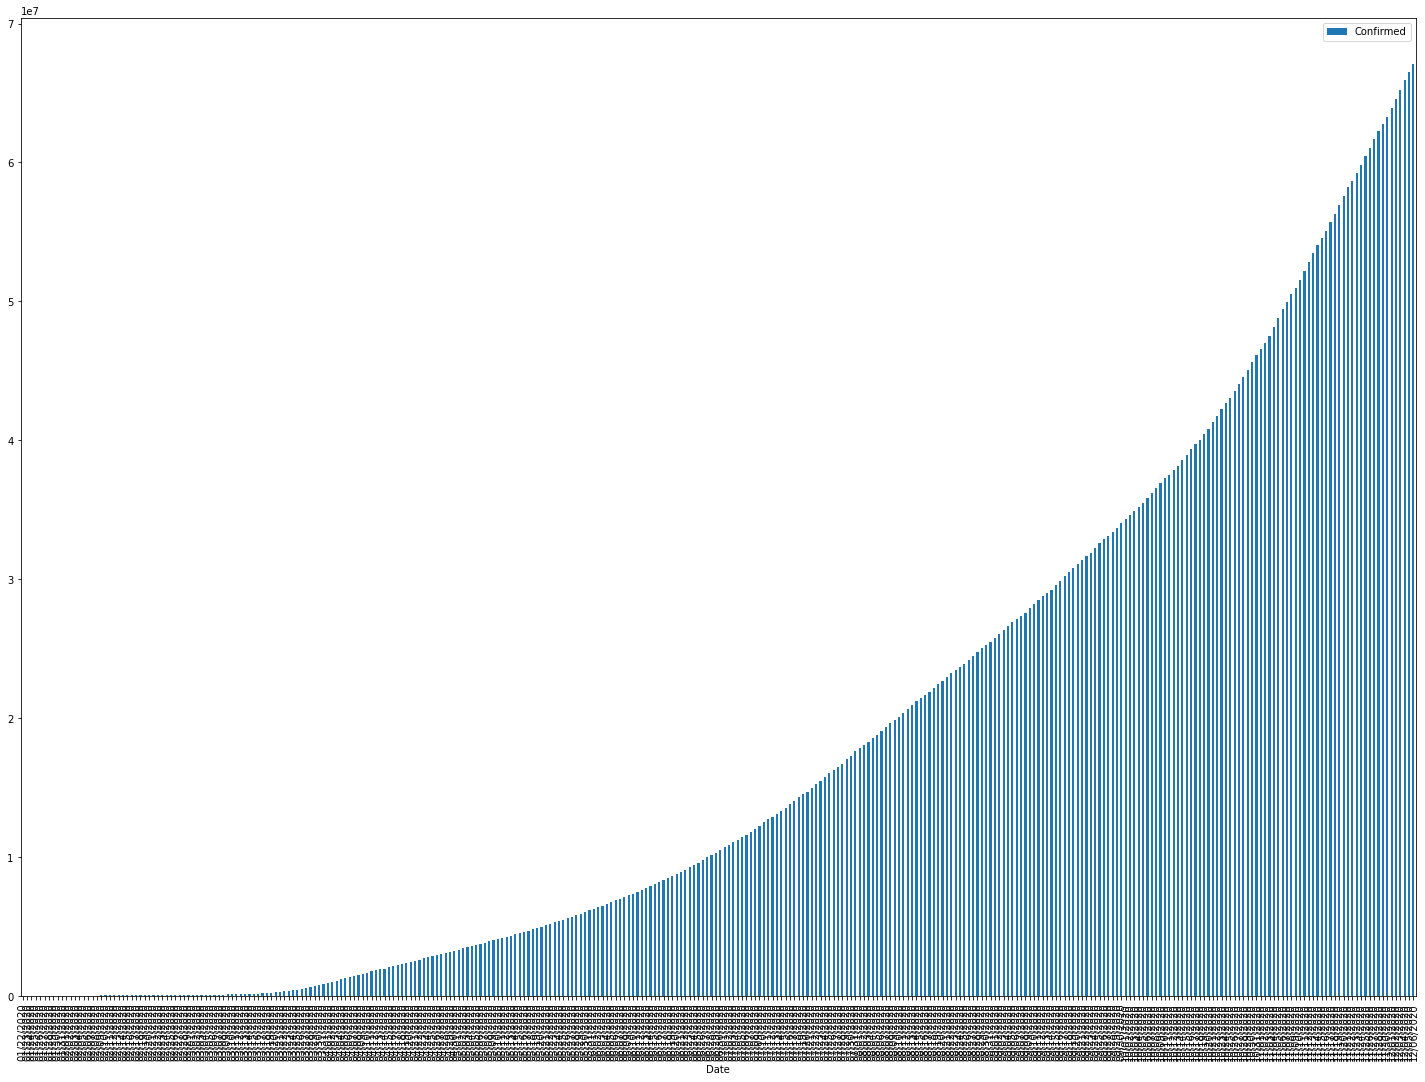

In [17]:
#visualizing using pandas matplotlib
confirmed_cases.plot(kind='bar',x='Date',y='Confirmed')

<AxesSubplot:xlabel='Date', ylabel='Confirmed'>

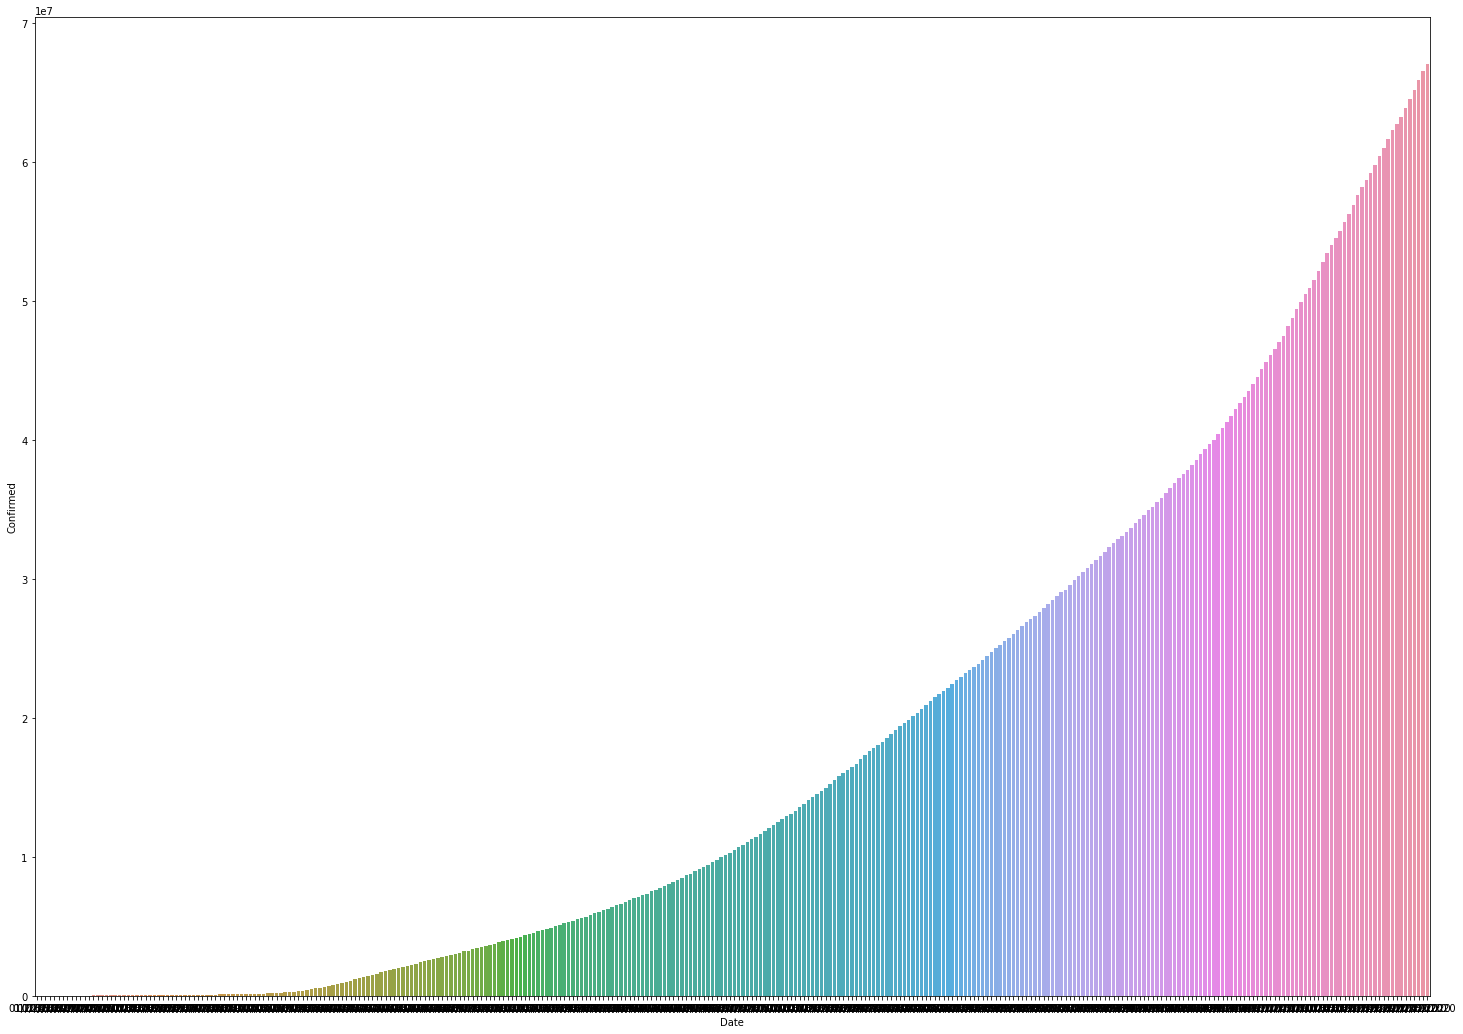

In [18]:
#visualizing using sns
sns.barplot(x=confirmed_cases['Date'], y = confirmed_cases['Confirmed'])

In [19]:
#visualizing using plotly
confirmed_cases.iplot(kind = 'bar', x = 'Date', y = 'Confirmed')

In [20]:
#visualizing using plotly
death_cases.iplot(kind = 'bar', x = 'Date', y = 'Deaths')

In [21]:
#visualizing using plotly
recovered_cases.iplot(kind = 'bar', x = 'Date', y = 'Recovered')

In [22]:
from fbprophet import Prophet

In [23]:
#date = ds(datestamp,column=y)
# fbprophet takes datestamp in YYYY-MM-DD, YYYY-MM-DD HH:MM:SS
confirmed_cases.columns = ['ds','y']

#change format of date
confirmed_cases['ds'] = pd.to_datetime(confirmed_cases['ds'])

confirmed_cases

,ds,y
0,2020-01-22,555.00
1,2020-01-23,653.00
2,2020-01-24,941.00
3,2020-01-25,1438.00
4,2020-01-26,2118.00
...,...,...
315,2020-12-02,64530517.00
316,2020-12-03,65221040.00
317,2020-12-04,65899441.00
318,2020-12-05,66540034.00


In [24]:
model = Prophet() 
model.fit(confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
#number of confirmed cases
future = model.make_future_dataframe(periods=120)#periods means days
future.tail()

,ds
435,2021-04-01
436,2021-04-02
437,2021-04-03
438,2021-04-04
439,2021-04-05


In [26]:
forecast = model.predict(future)

In [27]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-50914.69,-698255.92,495908.50,-50914.69,-50914.69,-19182.24,-19182.24,-19182.24,-19182.24,-19182.24,-19182.24,0.00,0.00,0.00,-70096.93
1,2020-01-23,-46711.76,-617106.94,532543.64,-46711.76,-46711.76,4569.10,4569.10,4569.10,4569.10,4569.10,4569.10,0.00,0.00,0.00,-42142.66
2,2020-01-24,-42508.83,-604684.43,599029.03,-42508.83,-42508.83,36866.38,36866.38,36866.38,36866.38,36866.38,36866.38,0.00,0.00,0.00,-5642.46
3,2020-01-25,-38305.90,-598324.96,565158.38,-38305.90,-38305.90,42251.87,42251.87,42251.87,42251.87,42251.87,42251.87,0.00,0.00,0.00,3945.97
4,2020-01-26,-34102.97,-617797.00,593518.82,-34102.97,-34102.97,16340.08,16340.08,16340.08,16340.08,16340.08,16340.08,0.00,0.00,0.00,-17762.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-04-01,123415908.11,114007436.20,131932243.08,113779162.49,131705776.21,4569.10,4569.10,4569.10,4569.10,4569.10,4569.10,0.00,0.00,0.00,123420477.21
436,2021-04-02,123916192.70,114240510.97,132407464.24,114140950.60,132288128.30,36866.38,36866.38,36866.38,36866.38,36866.38,36866.38,0.00,0.00,0.00,123953059.07
437,2021-04-03,124416477.29,114682450.02,133105037.91,114502876.65,132882974.52,42251.87,42251.87,42251.87,42251.87,42251.87,42251.87,0.00,0.00,0.00,124458729.16
438,2021-04-04,124916761.87,115088087.53,133565965.85,114855124.14,133505602.47,16340.08,16340.08,16340.08,16340.08,16340.08,16340.08,0.00,0.00,0.00,124933101.95


In [28]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
420,2021-03-17,115892457.04,108495910.55,122475040.06
421,2021-03-18,116416492.97,108761750.59,123255079.28
422,2021-03-19,116949074.84,109279706.99,123966990.43
423,2021-03-20,117454744.92,109575143.03,124418852.58
424,2021-03-21,117929117.71,109965232.39,125181964.47
425,2021-03-22,118373526.86,110527627.35,125647963.52
426,2021-03-23,118872037.00,110747871.41,126400423.40
427,2021-03-24,119394449.16,111142380.51,126695431.15
428,2021-03-25,119918485.09,111389672.98,127600323.41
429,2021-03-26,120451066.95,112129984.55,128021071.17


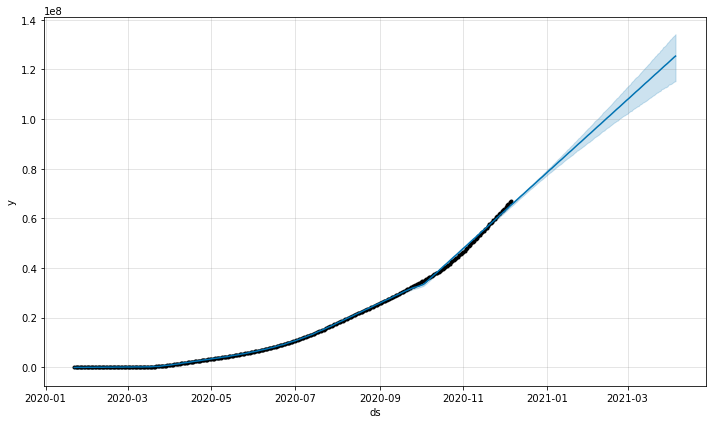

In [29]:
confirmed_forecast = model.plot(forecast)


In [30]:
#pred of deaths
death_cases.columns=['ds','y']
death_cases['ds'] = pd.to_datetime(death_cases['ds'])
death_cases

,ds,y
0,2020-01-22,17.00
1,2020-01-23,18.00
2,2020-01-24,26.00
3,2020-01-25,42.00
4,2020-01-26,56.00
...,...,...
315,2020-12-02,1493742.00
316,2020-12-03,1506260.00
317,2020-12-04,1518670.00
318,2020-12-05,1528868.00


In [31]:
model = Prophet()
model.fit(death_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future = model.make_future_dataframe(periods=120)
future.tail(20)

,ds
420,2021-03-17
421,2021-03-18
422,2021-03-19
423,2021-03-20
424,2021-03-21
425,2021-03-22
426,2021-03-23
427,2021-03-24
428,2021-03-25
429,2021-03-26


In [33]:
forecast_deaths = model.predict(future)

In [34]:
forecast_deaths

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1322.27,-13222.99,10682.71,-1322.27,-1322.27,-199.12,-199.12,-199.12,-199.12,-199.12,-199.12,0.00,0.00,0.00,-1521.39
1,2020-01-23,-1200.74,-12564.57,11746.83,-1200.74,-1200.74,646.73,646.73,646.73,646.73,646.73,646.73,0.00,0.00,0.00,-554.01
2,2020-01-24,-1079.21,-11906.56,12660.27,-1079.21,-1079.21,1366.58,1366.58,1366.58,1366.58,1366.58,1366.58,0.00,0.00,0.00,287.37
3,2020-01-25,-957.68,-12638.37,12371.15,-957.68,-957.68,1230.62,1230.62,1230.62,1230.62,1230.62,1230.62,0.00,0.00,0.00,272.94
4,2020-01-26,-836.14,-12320.46,11105.74,-836.14,-836.14,-62.51,-62.51,-62.51,-62.51,-62.51,-62.51,0.00,0.00,0.00,-898.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-04-01,2372680.72,2168169.42,2598385.77,2169951.50,2600580.84,646.73,646.73,646.73,646.73,646.73,646.73,0.00,0.00,0.00,2373327.45
436,2021-04-02,2380256.28,2177016.24,2612458.31,2173033.45,2610610.03,1366.58,1366.58,1366.58,1366.58,1366.58,1366.58,0.00,0.00,0.00,2381622.85
437,2021-04-03,2387831.84,2179762.59,2620975.09,2176139.93,2620639.23,1230.62,1230.62,1230.62,1230.62,1230.62,1230.62,0.00,0.00,0.00,2389062.45
438,2021-04-04,2395407.40,2179012.99,2632632.02,2179890.94,2630870.16,-62.51,-62.51,-62.51,-62.51,-62.51,-62.51,0.00,0.00,0.00,2395344.89


In [35]:
forecast_deaths[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-1521.39,-13222.99,10682.71
1,2020-01-23,-554.01,-12564.57,11746.83
2,2020-01-24,287.37,-11906.56,12660.27
3,2020-01-25,272.94,-12638.37,12371.15
4,2020-01-26,-898.65,-12320.46,11105.74
...,...,...,...,...
435,2021-04-01,2373327.45,2168169.42,2598385.77
436,2021-04-02,2381622.85,2177016.24,2612458.31
437,2021-04-03,2389062.45,2179762.59,2620975.09
438,2021-04-04,2395344.89,2179012.99,2632632.02


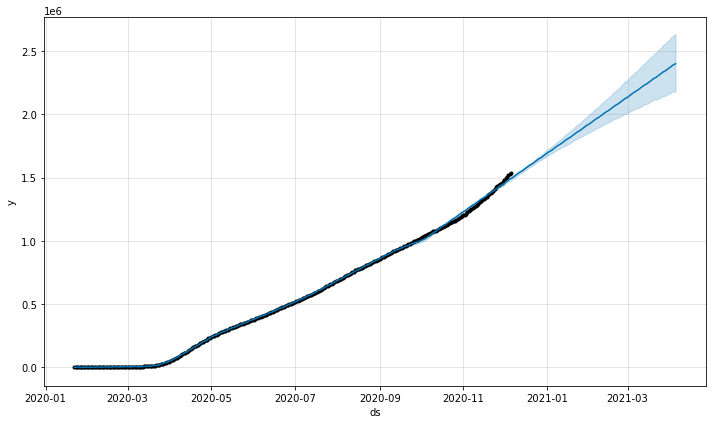

In [36]:
death_plot = model.plot(forecast_deaths)

In [37]:
#prediction of recovery
recovered_cases.columns=['ds','y']
recovered_cases['ds'] = pd.to_datetime(recovered_cases['ds'])
recovered_cases

,ds,y
0,2020-01-22,28.00
1,2020-01-23,30.00
2,2020-01-24,36.00
3,2020-01-25,39.00
4,2020-01-26,52.00
...,...,...
315,2020-12-02,41496318.00
316,2020-12-03,41932091.00
317,2020-12-04,42352021.00
318,2020-12-05,42789879.00


In [38]:
model = Prophet()
model.fit(recovered_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
future = model.make_future_dataframe(periods=120)
future.tail(120)

,ds
320,2020-12-07
321,2020-12-08
322,2020-12-09
323,2020-12-10
324,2020-12-11
...,...
435,2021-04-01
436,2021-04-02
437,2021-04-03
438,2021-04-04


In [40]:
forecast_recovered = model.predict(future)

In [41]:
forecast_recovered[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-33589.02,-458182.63,347073.81
1,2020-01-23,-28990.81,-434089.70,348328.40
2,2020-01-24,-38215.74,-448648.32,333862.82
3,2020-01-25,-12393.41,-409642.90,395909.26
4,2020-01-26,-23831.52,-426782.25,373791.75
...,...,...,...,...
435,2021-04-01,73987200.15,69202597.83,78122117.84
436,2021-04-02,74255380.64,69304279.80,78453910.89
437,2021-04-03,74558608.38,69674695.38,78725044.42
438,2021-04-04,74824575.69,69920632.15,79151404.37


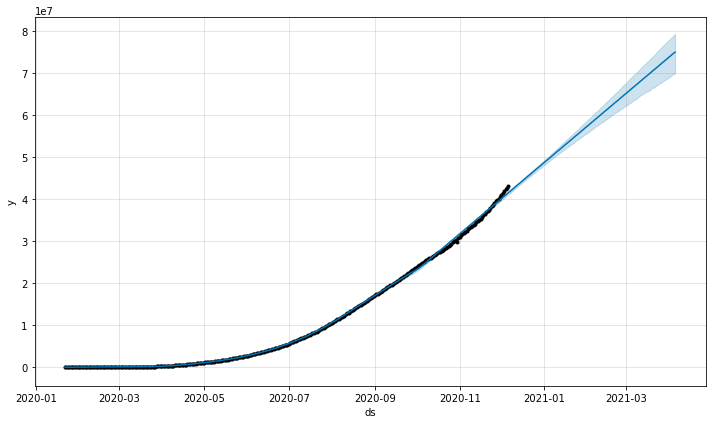

In [43]:
recovered_plot = model.plot(forecast_recovered)